We will be predicting the future stock prices of the Apple Company (AAPL), based on its stock prices of the past 5 years.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('AAPL2.csv', index_col ='Date')

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,17.065252,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.849854,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.380503,594333600
2013-01-07,18.642857,18.903572,18.400000,18.710714,16.284145,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761072,16.327978,458707200


<AxesSubplot:xlabel='Date', ylabel='Open Price'>

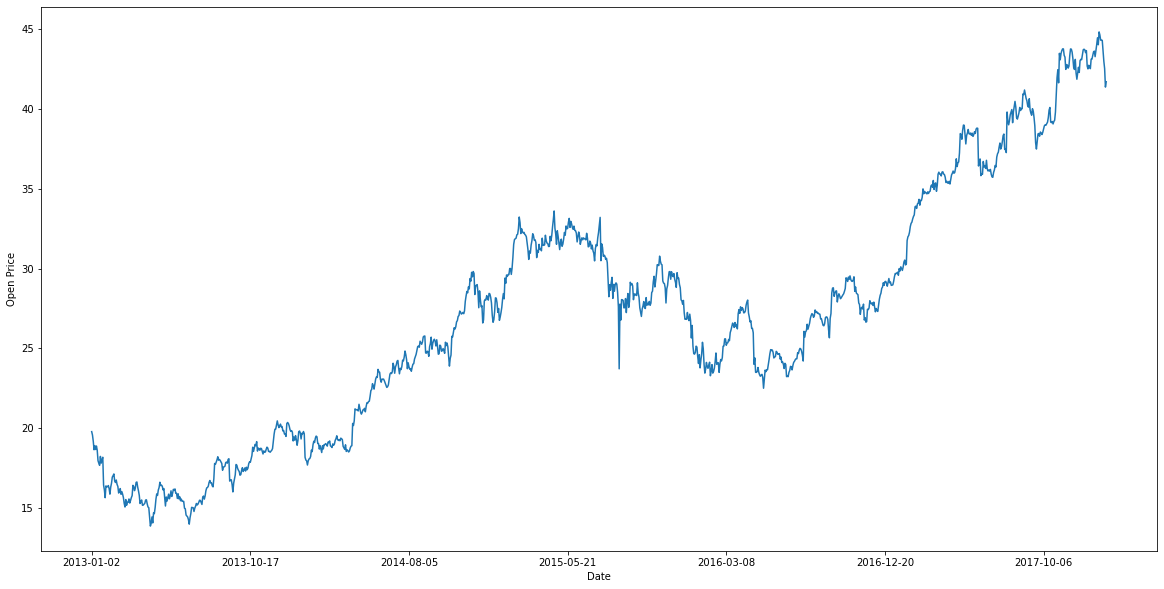

In [6]:
plt.figure(figsize=(20,10))
df['Open'].plot(xlabel='Date', ylabel='Open Price')

You can see that the trend is highly non-linear and it is very difficult to capture the trend using this information. This is where the power of LSTM can be utilized. LSTM (Long Short-Term Memory network) is a type of recurrent neural network capable of remembering the past information and while predicting the future values, it takes this past information into account.

In [7]:
apple_training_complete = pd.read_csv('AAPL_training.csv')

In [8]:
apple_training_processed = apple_training_complete.iloc[:, 1:2].values

In [9]:
apple_training_complete.iloc[:,1:2] #the first columns is the date index

,Open
0,18.233213
1,19.779285
2,19.567142
3,19.177500
4,18.642857
...,...
1255,43.669998
1256,42.700001
1257,42.525002
1258,42.750000


In [10]:
apple_training_processed

array([[18.233213],
       [19.779285],
       [19.567142],
       ...,
       [42.525002],
       [42.75    ],
       [42.630001]])

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [12]:
apple_training_scaled = scaler.fit_transform(apple_training_processed)

As I said earlier, in a time series problems, we have to predict a value at time T, based on the data from days T-N where N can be any number of steps. In this article, we are going to predict the opening stock price of the data based on the opening stock prices for the past 60 days. 

Our feature set should contain the opening stock price values for the past 60 days while the label or dependent variable should be the stock price at the 61st day. Execute the following script to create feature and label set.

In [13]:
len(apple_training_scaled)

1260

In [14]:
features_set = []
labels = []
for i in range(60, 1260):
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])

In [15]:
features_set

[array([0.14628787, 0.19795893, 0.19086893, 0.17784675, 0.15997852,
        0.16858436, 0.16057535, 0.1677966 , 0.15878493, 0.13691816,
        0.13169017, 0.12732156, 0.14602531, 0.13195272, 0.1391621 ,
        0.14423489, 0.08597521, 0.07605636, 0.05951303, 0.08418478,
        0.08239436, 0.08237053, 0.08491289, 0.07870613, 0.06693724,
        0.08176177, 0.0898544 , 0.10268564, 0.10566962, 0.10926236,
        0.09458104, 0.09137027, 0.09653854, 0.08728814, 0.08321795,
        0.06926477, 0.07314397, 0.07863455, 0.06666273, 0.07216524,
        0.06693724, 0.05971596, 0.04754118, 0.03999762, 0.05555025,
        0.0436023 , 0.0499284 , 0.04986871, 0.0568513 , 0.04831701,
        0.05354504, 0.05963238, 0.06383385, 0.08537841, 0.08289567,
        0.0743018 , 0.0795059 , 0.09157317, 0.09246841, 0.08174984]),
 array([0.19795893, 0.19086893, 0.17784675, 0.15997852, 0.16858436,
        0.16057535, 0.1677966 , 0.15878493, 0.13691816, 0.13169017,
        0.12732156, 0.14602531, 0.13195272, 0.

In [16]:
features_set[0] #for examples the first 60

array([0.14628787, 0.19795893, 0.19086893, 0.17784675, 0.15997852,
       0.16858436, 0.16057535, 0.1677966 , 0.15878493, 0.13691816,
       0.13169017, 0.12732156, 0.14602531, 0.13195272, 0.1391621 ,
       0.14423489, 0.08597521, 0.07605636, 0.05951303, 0.08418478,
       0.08239436, 0.08237053, 0.08491289, 0.07870613, 0.06693724,
       0.08176177, 0.0898544 , 0.10268564, 0.10566962, 0.10926236,
       0.09458104, 0.09137027, 0.09653854, 0.08728814, 0.08321795,
       0.06926477, 0.07314397, 0.07863455, 0.06666273, 0.07216524,
       0.06693724, 0.05971596, 0.04754118, 0.03999762, 0.05555025,
       0.0436023 , 0.0499284 , 0.04986871, 0.0568513 , 0.04831701,
       0.05354504, 0.05963238, 0.06383385, 0.08537841, 0.08289567,
       0.0743018 , 0.0795059 , 0.09157317, 0.09246841, 0.08174984])

In [17]:
features_set[1]

array([0.19795893, 0.19086893, 0.17784675, 0.15997852, 0.16858436,
       0.16057535, 0.1677966 , 0.15878493, 0.13691816, 0.13169017,
       0.12732156, 0.14602531, 0.13195272, 0.1391621 , 0.14423489,
       0.08597521, 0.07605636, 0.05951303, 0.08418478, 0.08239436,
       0.08237053, 0.08491289, 0.07870613, 0.06693724, 0.08176177,
       0.0898544 , 0.10268564, 0.10566962, 0.10926236, 0.09458104,
       0.09137027, 0.09653854, 0.08728814, 0.08321795, 0.06926477,
       0.07314397, 0.07863455, 0.06666273, 0.07216524, 0.06693724,
       0.05971596, 0.04754118, 0.03999762, 0.05555025, 0.0436023 ,
       0.0499284 , 0.04986871, 0.0568513 , 0.04831701, 0.05354504,
       0.05963238, 0.06383385, 0.08537841, 0.08289567, 0.0743018 ,
       0.0795059 , 0.09157317, 0.09246841, 0.08174984, 0.07382435])

In [18]:
labels

[0.07382434842934815,
 0.06437098976790179,
 0.04730245336878802,
 0.05180237213937877,
 0.05465504338044813,
 0.043602295866283725,
 0.04402005666240083,
 0.04582241042030444,
 0.04789928315255265,
 0.05460731838709976,
 0.055120562590777356,
 0.046586311101652234,
 0.040105036427237506,
 0.038553372567867616,
 0.020315105939626044,
 0.0,
 0.005574132171294377,
 0.01912151321382416,
 0.006648378992861637,
 0.027763212779710444,
 0.026068273677704368,
 0.0387682018796629,
 0.05625449907489377,
 0.06742659249329297,
 0.06422774794612918,
 0.07560277284885031,
 0.08085459421072427,
 0.09190737514575253,
 0.08482930410843681,
 0.08574837785989431,
 0.08355215922341142,
 0.07584149807818341,
 0.07863454649843105,
 0.06110052430985158,
 0.04209835700026232,
 0.06096921373641617,
 0.052446893495628144,
 0.05989496691484897,
 0.06693724420715341,
 0.057269056233911764,
 0.06311770737955058,
 0.07391983183690853,
 0.06210315022053248,
 0.06884701262095472,
 0.07702319297651194,
 0.074910493078

In the script above we create two lists: feature_set and labels. There are 1260 records in the training data. We execute a loop that starts from 61st record and stores all the previous 60 records to the feature_set list. The 61st record is stored in the labels list.

We need to convert both the feature_set and the labels list to the numpy array before we can use it for training. Execute the following script:

In [19]:
labels[0] #in fact, as just wrote above.

0.07382434842934815

In [20]:
features_set, labels = np.array(features_set), np.array(labels)

In order to train LSTM on our data, we need to convert our data into the shape accepted by the LSTM. We need to convert our data into three-dimensional format. The first dimension is the number of records or rows in the dataset which is 1260 in our case. The second dimension is the number of time steps which is 60 while the last dimension is the number of indicators. Since we are only using one feature, i.e Open, the number of indicators will be one. Execute the following script:

In [21]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

The shape property is usually used to get the current shape of an array, but may also be used to reshape the array in-place by assigning a tuple of array dimensions to it.

In [22]:
features_set #see that now has dimension 3. where we have the sample, the time steps, and the features (which is just one)

array([[[0.14628787],
        [0.19795893],
        [0.19086893],
        ...,
        [0.09157317],
        [0.09246841],
        [0.08174984]],

       [[0.19795893],
        [0.19086893],
        [0.17784675],
        ...,
        [0.09246841],
        [0.08174984],
        [0.07382435]],

       [[0.19086893],
        [0.17784675],
        [0.15997852],
        ...,
        [0.08174984],
        [0.07382435],
        [0.06437099]],

       ...,

       [[0.82579371],
        [0.82370491],
        [0.82053   ],
        ...,
        [0.9921461 ],
        [0.99640719],
        [0.96398905]],

       [[0.82370491],
        [0.82053   ],
        [0.82512526],
        ...,
        [0.99640719],
        [0.96398905],
        [0.95814044]],

       [[0.82053   ],
        [0.82512526],
        [0.83172595],
        ...,
        [0.96398905],
        [0.95814044],
        [0.96566006]]])

In [23]:
features_set.shape 

(1200, 60, 1)

In [30]:
features_set.shape[0]

1200

In [32]:
features_set.shape[1]

60

LSTM MODEL 

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [25]:
model = Sequential() #istantiate the model, the class Sequential

In [116]:
# add the LSTM layer

model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

To add a layer to the sequential model, the add method is used. Inside the add method, we passed our LSTM layer. The first parameter to the LSTM layer is the number of neurons or nodes that we want in the layer. The second parameter is return_sequences, which is set to true since we will add more layers to the model. The first parameter to the input_shape is the number of time steps while the last parameter is the number of indicators.

In [117]:
#let's add the Droput layer to the model to avoid the overfitting

model.add(Dropout(0.2))

In [118]:
#let's add three more layers to the model

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

To make our model more robust, we add a dense layer at the end of the model. The number of neurons in the dense layer will be set to 1 since we want to predict a single value in the output.

In [119]:
model.add(Dense(units = 1))

In [120]:
#we compile now the model, where we use the 'mean squared error' as a loss function
# and the 'adam' as optimizer

model.compile(optimizer ='adam', loss='mean_squared_error')

In [121]:
#TRAINING

model.fit(features_set, labels, epochs=100, batch_size = 32)

Epoch 1/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0358
Epoch 2/100
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0055
Epoch 3/100
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 4/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 5/100
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0043
Epoch 6/100
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 7/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0037A: 0s - loss: 0.003
Epoch 8/100
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0037
Epoch 9/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0037
Epoch 10/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0035
Epoch 11/100
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0036
Epoch 12/100
1200/1200 [==============================]

Epoch 97/100
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0012
Epoch 98/100
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0012
Epoch 99/100
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0011
Epoch 100/100
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0012


In [123]:
#TESTING THE MODEL

#we need however to convert the test data in the right format as we did before

apple_testing_complete = pd.read_csv('AAPL_test.csv')
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values

In [126]:
df2 = pd.read_csv('AAPL_test.csv', index_col='Date')

<AxesSubplot:xlabel='Date', ylabel='Open Price'>

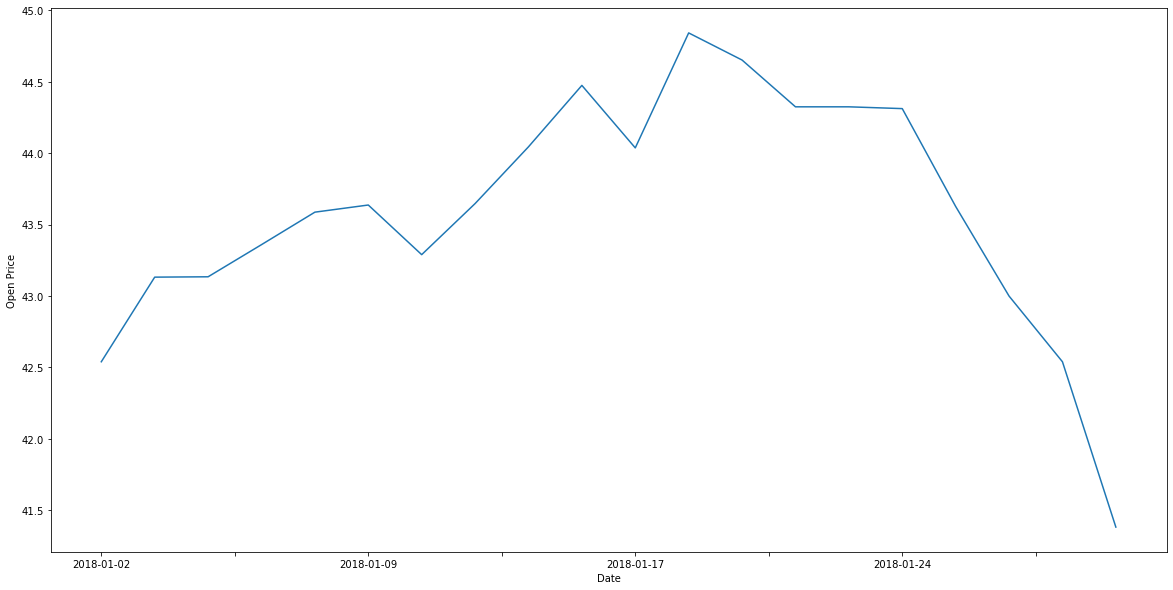

In [127]:
plt.figure(figsize=(20,10))
df2['Open'].plot(xlabel='Date', ylabel='Open Price')

For each day of January 2018, we want our feature set to contain the opening stock prices for the previous 60 days. For the 1st of January, we need the stock prices for the previous 60 days. To do so, we need to concatenate our training data and test data before preprocessing. Execute the following script to do so:

In [130]:
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)

Now let's prepare our test inputs. The input for each day should contain the opening stock prices for the previous 60 days. That means we need opening stock prices for the 20 test days for the month of January 2018 and the 60 stock prices from the last 60 days for the training set. Execute the following script to fetch those 80 values.

In [131]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values


In [132]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [133]:
#scale the data

test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

In [134]:
# Finally, we need to convert our data into the three-dimensional format which can be used as input to the LSTM

In [135]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

PREDICTIONS 

In [136]:
predictions = model.predict(test_features)

Since we scaled our data, the predictions made by the LSTM are also scaled. We need to reverse the scaled prediction back to their actual values. To do so, we can use the ìnverse_transform method of the scaler object we created during training. Take a look at the following script:

In [137]:
predictions = scaler.inverse_transform(predictions)

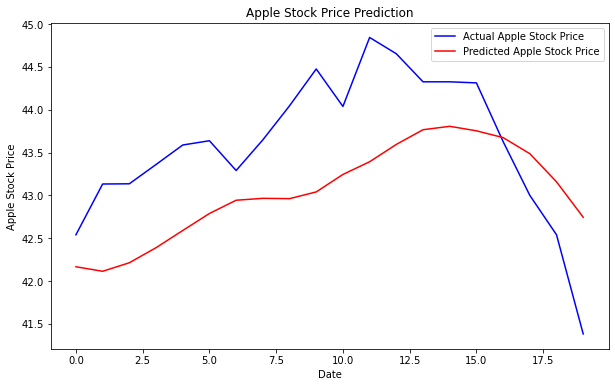

In [138]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [139]:
#WE HAVE GOT THE TREND!